In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.2438 - acc: 0.9231 - val_loss: 0.0540 - val_acc: 0.9828
Epoch 2/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.0757 - acc: 0.9782 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 3/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0553 - acc: 0.9836 - val_loss: 0.0296 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0441 - acc: 0.9868 - val_loss: 0.0253 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0376 - acc: 0.9889 - val_loss: 0.0272 - val_acc: 0.9908
Epoch 6/12
60000/600

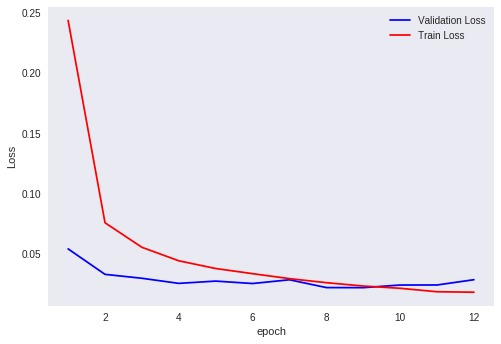

In [3]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.2632 - acc: 0.9193 - val_loss: 0.0611 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0906 - acc: 0.9733 - val_loss: 0.0442 - val_acc: 0.9842
Epoch 3/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0652 - acc: 0.9815 - val_loss: 0.0450 - val_acc: 0.9857
Epoch 4/12
60000/60000 [==============================] - 17s 280us/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.0357 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0465 - acc: 0.9857 - val_loss: 0.0323 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.0399 - acc: 0.9880 - val_loss: 0.0392 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 17s 278us/step - loss: 0.0349 - acc: 0.9892 - val_loss: 0.

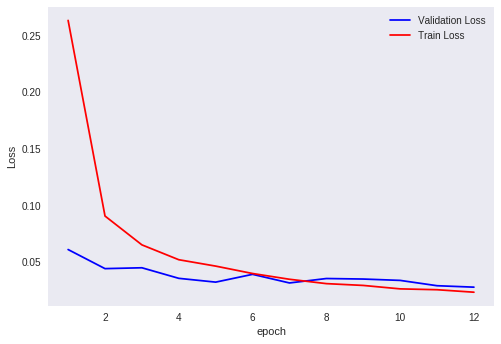

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 244us/step - loss: 0.2231 - acc: 0.9304 - val_loss: 0.0444 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0658 - acc: 0.9809 - val_loss: 0.0368 - val_acc: 0.9887
Epoch 3/12
60000/60000 [==============================] - 14s 230us/step - loss: 0.0491 - acc: 0.9861 - val_loss: 0.0257 - val_acc: 0.9916
Epoch 4/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0375 - acc: 0.9891 - val_loss: 0.0224 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0314 - acc: 0.9907 - val_loss: 0.0222 - val_acc: 0.9931
Epoch 6/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.0214 - val_acc: 0.9935
Epoch 7/12
60000/60000 [==============================] - 14s 229us/step - loss: 0.0239 - acc: 0.9929 - val_loss: 0.

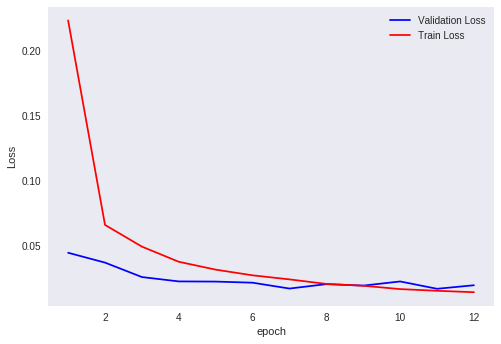

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#### Architecture 2

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.3137 - acc: 0.9058 - val_loss: 0.0531 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0795 - acc: 0.9767 - val_loss: 0.0336 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0562 - acc: 0.9841 - val_loss: 0.0281 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0452 - acc: 0.9870 - val_loss: 0.0257 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0373 - acc: 0.9893 - val_loss: 0.0288 - val_acc: 0.9907
Epoch 6/12
60000/60000 [======

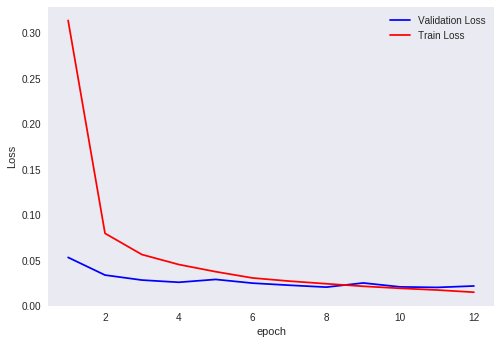

In [3]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Conv2D(128, (2, 2), activation='relu'))
model.add(Conv2D(256, (2, 2), activation='relu'))
model.add(Conv2D(512, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.3030 - acc: 0.9082 - val_loss: 0.0565 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0888 - acc: 0.9738 - val_loss: 0.0443 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0654 - acc: 0.9810 - val_loss: 0.0301 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0520 - acc: 0.9851 - val_loss: 0.0413 - val_acc: 0.9868
Epoch 5/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0435 - acc: 0.9872 - val_loss: 0.0300 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0372 - acc: 0.9888 - val_loss: 0.0298 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 110s 2ms/step - loss: 0.0312 - acc: 0.9906 - val_loss: 0.0298 - 

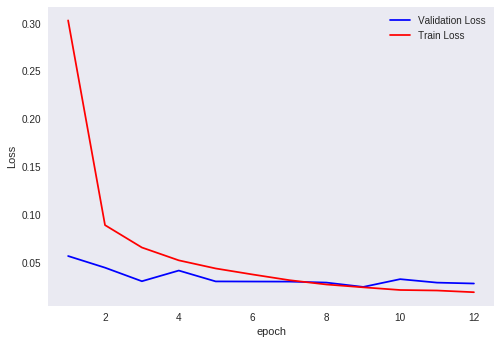

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(Conv2D(512, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
score_train= model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 47s 787us/step - loss: 0.3803 - acc: 0.8794 - val_loss: 0.0487 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 44s 741us/step - loss: 0.0693 - acc: 0.9808 - val_loss: 0.0371 - val_acc: 0.9890
Epoch 3/12
60000/60000 [==============================] - 44s 741us/step - loss: 0.0501 - acc: 0.9859 - val_loss: 0.0318 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 44s 741us/step - loss: 0.0389 - acc: 0.9892 - val_loss: 0.0271 - val_acc: 0.9925
Epoch 5/12
60000/60000 [==============================] - 44s 740us/step - loss: 0.0304 - acc: 0.9915 - val_loss: 0.0240 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 44s 738us/step - loss: 0.0251 - acc: 0.9927 - val_loss: 0.0232 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 44s 737us/step - loss: 0.0206 - acc: 0.9938 - val_loss: 0.

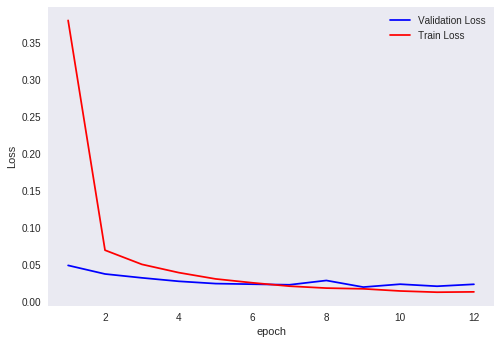

In [7]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)